<h2 style='text-align:center'><b> World Data Analysis</b></h1>
<h5 style="text-align: center;"> Naufal Amara Syihan</h2>

<a id="numerical"></a>
# </span> Introduction</span></b>

____

<a id="basic"></a>
### <b>The World</span></b>

The following dataset is a data of the world. It contains it economic, demographic, and Military data. In this article, I want to observe the correlation between agricultural land and its labor force and military. One of the more interesting aspects of the world is its agricultural land. The common logic is that if a country has a breadth of farmable land. Its economy and labor will be higher because one of the basic needs are fulfilled. Hence, in this Notebook I seek to observe the correlation between the farmable land, its labor and its economy.

<a id="basic"></a>
### <b> Methodology</span></b>
To achieve this, I aim to observe the correlation between:

- Agricultural Land
- Armed Forces Size
- Labor Force
- Pysicians per Thousand
- GDP

The data provided is accurate as of 2023.


<a id="numerical"></a>
# </span> Data Examination</span></b>

___



In [38]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv('D:\Coding Projects\World_data_article\data\world_data_V4.csv')
df = data.copy()
df.head(3)

,Country,Density _(P/Km2),Abbreviation,Agricultural _Land,Land_Area(Km2),Armed_Forces_size,Birth_Rate,Calling_Code,Capital/Major City,Co2_Emissions,...,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude,Labor_force,Agricultural_land
0,Afghanistan,60.0,AF,0.58,652230.0,323000.0,32.49,93,Kabul,8672.0,...,38041754.0,0.49,0.09,0.71,0.11,9797273.0,33.939110,67.709953,18602417.71,378945.63
1,Albania,105.0,AL,0.43,28748.0,9000.0,11.78,355,Tirana,4536.0,...,2854191.0,0.56,0.19,0.37,0.12,1747593.0,41.153332,20.168331,1589784.39,12390.39
2,Algeria,18.0,DZ,0.17,2381741.0,317000.0,24.28,213,Algiers,150006.0,...,43053054.0,0.41,0.37,0.66,0.12,31510100.0,28.033886,1.659626,17737858.25,414422.93


### columns

- `Country`: Name of the country.
- `Density (P/Km2)`: Population density measured in persons per square kilometer.
- `Abbreviation`: Abbreviation or code representing the country.
- `Agricultural Land (%)`: Percentage of land area used for agricultural purposes.
- `Land Area (Km2)`: Total land area of the country in square kilometers.
- `Armed Forces Size`: Size of the armed forces in the country.
- `Birth Rate`: Number of births per 1,000 population per year.
- `Calling Code`: International calling code for the country.
- `Capital/Major City`: Name of the capital or major city.
- `CO2 Emissions`: Carbon dioxide emissions in tons.
- `CPI`: Consumer Price Index, a measure of inflation and purchasing power.
- `CPI Change (%)`: Percentage change in the Consumer Price Index compared to the previous year.
- `Currency_Code`: Currency code used in the country.
- `Fertility Rate`: Average number of children born to a woman during her lifetime.
- `Forested Area (%)`: Percentage of land area covered by forests.
- `Gasoline_Price`: Price of gasoline per liter in local currency.
- `GDP`: Gross Domestic Product, the total value of goods and services produced in the country.
- `Gross Primary Education Enrollment (%)`: Gross enrollment ratio for primary education.
- `Gross Tertiary Education Enrollment (%)`: Gross enrollment ratio for tertiary education.
- `Infant Mortality`: Number of deaths per 1,000 live births before reaching one year of age.
- `Largest City`: Name of the country's largest city.
- `Life Expectancy`: Average number of years a newborn is expected to live.
- `Maternal Mortality Ratio`: Number of maternal deaths per 100,000 live births.
- `Minimum Wage`: Minimum wage level in local currency.
- `Official Language`: Official language(s) spoken in the country.
- `Out of Pocket Health Expenditure (%)`: Percentage of total health expenditure paid out-of-pocket by individuals.
- `Physicians per Thousand`: Number of physicians per thousand people.
- `Population`: Total population of the country.
- `Population`: Labor Force Participation (%): Percentage of the population that is part of the labor force.
- `Tax Revenue (%)`: Tax revenue as a percentage of GDP.
- `Total Tax Rate`: Overall tax burden as a percentage of commercial profits.
- `Unemployment Rate`: Percentage of the labor force that is unemployed.
- `Urban Population`: Percentage of the population living in urban areas.
- `Latitude`: Latitude coordinate of the country's location.
- `Longitude`: Longitude coordinate of the country's location.

In [40]:
print(f'''
Data types of data: 
      
{df.dtypes}
''')


Data types of data: 
      
Country                                       object
Density _(P/Km2)                             float64
Abbreviation                                  object
Agricultural _Land                           float64
Land_Area(Km2)                               float64
Armed_Forces_size                            float64
Birth_Rate                                   float64
Calling_Code                                  object
Capital/Major City                            object
Co2_Emissions                                float64
CPI                                          float64
CPI_Change                                   float64
Currency_Code                                 object
Fertility_Rate                               float64
Forested_Area                                float64
Gasoline_Price                               float64
GDP                                          float64
Gross primary_education_enrollment           float64
Gross tertiary ed

In [41]:
#displaying shape of data
print(f'''The data has the following number of rows before processing:  
{df.shape}''')

The data has the following number of rows before processing:  
(195, 37)


In [42]:
df.describe()

,Density _(P/Km2),Agricultural _Land,Land_Area(Km2),Armed_Forces_size,Birth_Rate,Co2_Emissions,CPI,CPI_Change,Fertility_Rate,Forested_Area,...,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude,Labor_force,Agricultural_land
count,195.000000,195.000000,1.950000e+02,1.950000e+02,195.000000,1.880000e+02,179.000000,180.000000,188.000000,188.000000,...,1.940000e+02,177.000000,191.000000,188.00000,177.000000,1.900000e+02,194.000000,194.000000,1.950000e+02,1.950000e+02
mean,356.764103,0.382410,6.861187e+05,1.398721e+05,19.853282,1.777992e+05,190.035140,0.067833,2.698138,0.320691,...,3.938116e+07,0.624407,0.170785,0.39234,0.068136,2.230454e+07,19.092351,20.232434,2.374972e+07,2.558421e+05
std,1982.888967,0.221982,1.917275e+06,3.600758e+05,10.128281,8.387903e+05,396.868869,0.243951,1.282267,0.237683,...,1.450924e+08,0.115039,0.087256,0.16051,0.050828,7.543050e+07,23.961779,66.716110,8.656864e+07,6.704285e+05
min,2.000000,0.000000,4.900000e-01,0.000000e+00,0.000000,1.100000e+01,99.030000,-0.040000,0.980000,0.000000,...,8.360000e+02,0.000000,0.000000,0.08000,0.000000,5.464000e+03,-40.900557,-175.198242,0.000000e+00,0.000000e+00
25%,35.500000,0.210000,2.308300e+04,6.000000e+03,10.900000,2.304250e+03,113.960000,0.010000,1.705000,0.110000,...,1.962678e+06,0.560000,0.120000,0.30000,0.030000,1.152961e+06,4.544175,-7.941496,1.147368e+06,5.165500e+03
50%,89.000000,0.390000,1.184840e+05,2.300000e+04,17.880000,1.230300e+04,125.080000,0.020000,2.245000,0.320000,...,8.826588e+06,0.620000,0.170000,0.37000,0.050000,4.678104e+06,17.273849,20.972652,5.388380e+06,3.805510e+04
75%,216.500000,0.550000,5.205440e+05,1.230000e+05,28.445000,6.388425e+04,156.950000,0.042500,3.597500,0.480000,...,2.858549e+07,0.690000,0.220000,0.48000,0.090000,1.490324e+07,40.124603,48.281523,1.738090e+07,2.228166e+05
max,26337.000000,0.830000,1.709824e+07,3.031000e+06,46.080000,9.893038e+06,4583.710000,2.550000,6.910000,0.980000,...,1.397715e+09,0.870000,0.580000,1.06000,0.280000,8.429340e+08,64.963051,178.065032,9.504462e+08,5.393492e+06


In [43]:
print(f'This data has {df.duplicated().sum()} duplicated values')

This data has 0 duplicated values


In [44]:
pd.DataFrame(
    {'Nama': df.columns,
     'Tipe': df.dtypes,
     'NaN' : df.isna().sum(),
     'NaN (%)': df.isna().mean() * 100,
     'Sample': [df[col].unique() for col in df.columns]}
)

,Nama,Tipe,NaN,NaN (%),Sample
Country,Country,object,0,0.000000,"[Afghanistan, Albania, Algeria, Andorra, Angol..."
Density _(P/Km2),Density _(P/Km2),float64,0,0.000000,"[60.0, 105.0, 18.0, 164.0, 26.0, 223.0, 17.0, ..."
Abbreviation,Abbreviation,object,1,0.512821,"[AF, AL, DZ, AD, AO, AG, AR, AM, AU, AT, AZ, B..."
Agricultural _Land,Agricultural _Land,float64,0,0.000000,"[0.58, 0.43, 0.17, 0.4, 0.48, 0.21, 0.54, 0.59..."
Land_Area(Km2),Land_Area(Km2),float64,0,0.000000,"[652230.0, 28748.0, 2381741.0, 468.0, 1246700...."
Armed_Forces_size,Armed_Forces_size,float64,0,0.000000,"[323000.0, 9000.0, 317000.0, 0.0, 117000.0, 10..."
Birth_Rate,Birth_Rate,float64,0,0.000000,"[32.49, 11.78, 24.28, 7.2, 40.73, 15.33, 17.02..."
Calling_Code,Calling_Code,object,0,0.000000,"[93, 355, 213, 376, 244, 1268, 54, 374, 61, 43..."
Capital/Major City,Capital/Major City,object,0,0.000000,"[Kabul, Tirana, Algiers, Andorra la Vella, Lua..."
Co2_Emissions,Co2_Emissions,float64,7,3.589744,"[8672.0, 4536.0, 150006.0, 469.0, 34693.0, 557..."


#### Missing values
this data contains some missing values in the following columns:
- `Co2_Emissions` 3.5%
- `CPI` 8.2%
- `CPI_Change` 7.6%
- `Currency_Code` 7.6%
- `Fertility_Rate` 3.5%
- `Forested_Area` 3.5%
- `Gasoline_Price` 10.2%
- `GDP` 1%
- `Gross primary_education_enrollment` 3.5%
- `Gross tertiary education enrollment (%)` 5.6%
- `Infant mortality` 3%
- `Life expectancy` 3.5%
- `Maternal mortality ratio` 6.6%
- `Minimum wage` 23%
- `Out of pocket health expenditure` 3.5%
- `Physicians per thousand` 3.5%
- `Population: Labor force participation (%)` 9.2%
- `Tax revenue (%)` 2%
- `Total tax rate` 3.5%
- `Unemployment rate` 9.2%
- `Urban_population` 2.5%

<a id="numerical"></a>
# </span> Data analysis</span></b>

___



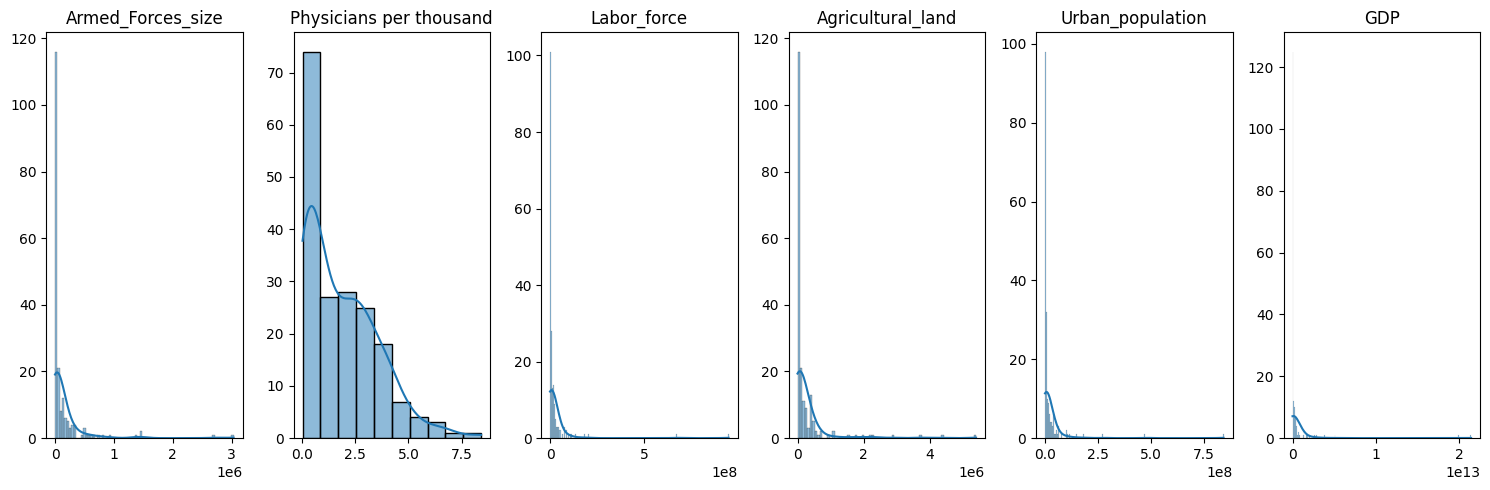

In [45]:
# Making a list of columns to plot
columns_to_plot = ['Armed_Forces_size','Physicians per thousand','Labor_force','Agricultural_land','Urban_population','GDP']

# Number of columns
num_columns = len(columns_to_plot)

# Create a subplot grid with 1 row and 'num_columns' columns
fig, axes = plt.subplots(1, num_columns, figsize=(15, 5))

# Iterate over the columns and plot their distributions
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('')  
    axes[i].set_ylabel('')  

plt.tight_layout()  
plt.show()

Upon checking the distribution of the observed columns, their distribution is not normal. Hence, The following correlation analysis will be using the spearman method. 

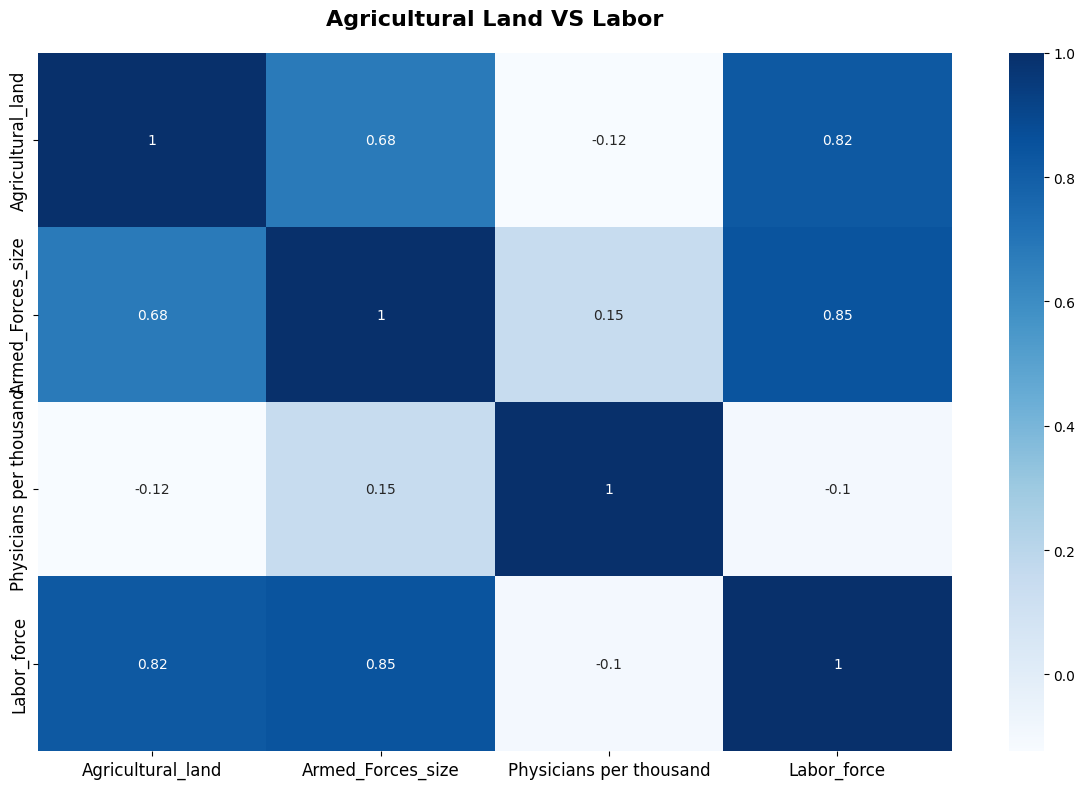

In [46]:
# grouping data by the median
LandLaborcorr = df.groupby(by='Agricultural_land')[['Armed_Forces_size','Physicians per thousand','Labor_force']].agg(func='median').reset_index()
LandLaborcorr

# making correlation
corrAge = LandLaborcorr.corr(method='spearman') 

#making heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corrAge, cmap='Blues', annot=True)
plt.title('Agricultural Land VS Labor', fontsize=16, fontweight='bold', pad=20)
plt.xlabel(None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

The correlation of Agricultural land is Strongest with labor force with a value of `0.82` suggesting more labor force is available when more agricultural land is available. While the correlation of agricultural land with the size of armed forces has a moderatly strong correlation of `0.68`. This indicates the availability of agricultural land does not always increase the size of armed forces. The weakest correlation is with Physicians per thousand with a value of `-0.12`. This indicates that the number of physicians in unrelated to the availability with agricultural land. Other variables which comes as striking is the correlation between labor force and armed forces size with a value of `0.85`. This means the more labor force available so is the size of armed forces.

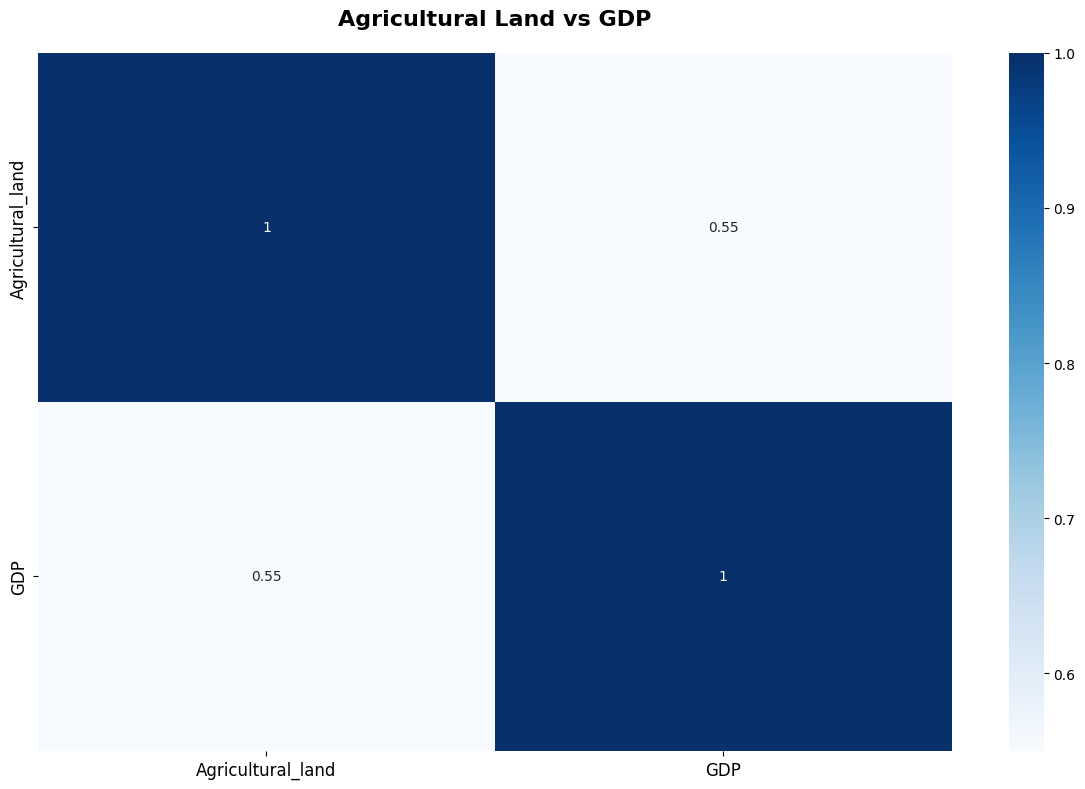

In [47]:
# grouping data by the median
econCorr = df.groupby(by='Agricultural_land')[['GDP']].agg(func='median').reset_index()
econCorr

# making correlation
corrAge = econCorr.corr(method='spearman') 

# making heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corrAge, cmap='Blues', annot=True)
plt.title('Agricultural Land vs GDP', fontsize=16, fontweight='bold', pad=20)
plt.xlabel(None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

The correlation coefficient of GDP and agricultural land is `0.55` meaning it has a moderate positive relationship. This highlights an increase in GDP following the availability of agricultural land although slightly. 

<a id="numerical"></a>
# </span> Conclusion</span></b>

____

Based on the analysis above we can draw the following conclusion: 

**Agricultural Land and labor**
With a coefficient of `0.82` labor and agricultural land has a strong positive correlation. Meaning as agriculture increases so does labor. This indicates agriculture requires more labor to manage. 

**Agricultural Land and Armed Forces Size**
With a coefficient of `0.68` armed forces size and agricultural land has a moderate positive correlation. Meaning The size of armed forces and agricultural land rise in tandem albeit slightly.

**Agricultural Land and Physicians per Thousand**
With a coefficient of `-0.12` agricultural land and physicians per thousand have a weak negative correlation. This indicates each variable has no relation. 

**Armed Forces Size and Labor**
With a coefficient of `0.85` labor and armed forces size have a strong positive correlation. One of the more interesting insight from this analysis. This coefficient indicates that the number of armed personnel increases with the number of labor present within the country.

**Agricultural land and GDP**
With a coefficient of `0.55` agricultural land and GDP have a moderat positive correlation. The availability of agricultural land does contribute to the influx of GDP. However, the correlation indicated within this analysis result only at a slight increase. Meaning, there are there are other factors that is yet to be analysed.